In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

In [2]:
df=pd.read_csv(r'C:\Users\KIRAN JEEVA\Downloads\python project datasets\Temperature IoT devices\IOT-temp.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 97606 entries, 0 to 97605
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   id          97606 non-null  object
 1   room_id/id  97606 non-null  object
 2   noted_date  97606 non-null  object
 3   temp        97606 non-null  int64 
 4   out/in      97606 non-null  object
dtypes: int64(1), object(4)
memory usage: 3.7+ MB


In [4]:
df.head()

,id,room_id/id,noted_date,temp,out/in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [5]:
df.rename(columns={'room_id/id':'room_id','out/in':'out_in'},inplace=True)
df.head()

,id,room_id,noted_date,temp,out_in
0,__export__.temp_log_196134_bd201015,Room Admin,08-12-2018 09:30,29,In
1,__export__.temp_log_196131_7bca51bc,Room Admin,08-12-2018 09:30,29,In
2,__export__.temp_log_196127_522915e3,Room Admin,08-12-2018 09:29,41,Out
3,__export__.temp_log_196128_be0919cf,Room Admin,08-12-2018 09:29,41,Out
4,__export__.temp_log_196126_d30b72fb,Room Admin,08-12-2018 09:29,31,In


In [6]:
for i in df.columns:
    print(df[i].value_counts())

__export__.temp_log_196108_4a983c7e    2
__export__.temp_log_196134_bd201015    1
__export__.temp_log_12544_1a76a951     1
__export__.temp_log_134983_a6423bbe    1
__export__.temp_log_127926_3ba19d7a    1
                                      ..
__export__.temp_log_60241_79017f66     1
__export__.temp_log_60247_15b91351     1
__export__.temp_log_60243_af6d035d     1
__export__.temp_log_60245_13fc6805     1
__export__.temp_log_133741_32958703    1
Name: id, Length: 97605, dtype: int64
Room Admin    97606
Name: room_id, dtype: int64
12-09-2018 03:09    65
09-09-2018 16:24    62
09-09-2018 17:31    53
11-09-2018 19:42    50
09-09-2018 16:08    50
                    ..
22-11-2018 21:23     1
22-11-2018 21:21     1
21-10-2018 05:41     1
21-10-2018 05:45     1
21-10-2018 21:54     1
Name: noted_date, Length: 27920, dtype: int64
39    10203
28     8831
29     7922
40     7798
31     7236
30     6614
37     5723
32     5408
27     4631
41     4354
36     3965
38     3867
42     3447
33     3

In [7]:
df.drop(columns='room_id',inplace=True)

In [8]:
df.duplicated().sum()

1

In [9]:
df.drop_duplicates(inplace=True)

In [10]:
df.shape

(97605, 4)

In [11]:
df['noted_date']=pd.to_datetime(df['noted_date'],format='%d-%m-%Y %H:%M')

In [12]:
df['noted_date'].dt.month.sort_values().unique()

array([ 7,  8,  9, 10, 11, 12], dtype=int64)

In [13]:
df['id'].values[0].split('_'),df['id'].values[0]

(['', '', 'export', '', '.temp', 'log', '196134', 'bd201015'],
 '__export__.temp_log_196134_bd201015')

In [14]:
df['id'].apply(lambda x: x.split('_')[6]).nunique()==df.shape[0]

True

In [15]:
df['num_id']=df['id'].apply(lambda x: x.split('_')[6])

In [16]:
df['noted_date'].dt.year.nunique()

1

In [17]:
df.drop('id',axis=1,inplace=True)

In [18]:
df=df.reindex(columns=['num_id','noted_date','temp','out_in'])

In [19]:
df.head()

,num_id,noted_date,temp,out_in
0,196134,2018-12-08 09:30:00,29,In
1,196131,2018-12-08 09:30:00,29,In
2,196127,2018-12-08 09:29:00,41,Out
3,196128,2018-12-08 09:29:00,41,Out
4,196126,2018-12-08 09:29:00,31,In


In [20]:
df['month']=df['noted_date'].dt.month_name()
df['day']=df['noted_date'].dt.day
df['day_name']=df['noted_date'].dt.day_name()
df['hour']=df['noted_date'].dt.hour
df.head()

,num_id,noted_date,temp,out_in,month,day,day_name,hour
0,196134,2018-12-08 09:30:00,29,In,December,8,Saturday,9
1,196131,2018-12-08 09:30:00,29,In,December,8,Saturday,9
2,196127,2018-12-08 09:29:00,41,Out,December,8,Saturday,9
3,196128,2018-12-08 09:29:00,41,Out,December,8,Saturday,9
4,196126,2018-12-08 09:29:00,31,In,December,8,Saturday,9


In [21]:
df.hour.sort_values().unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23], dtype=int64)

In [22]:
bins=[0,5,12,16,20,24]
df['time_of_day']=pd.cut(df['hour'],bins=bins,labels=['early_morning','morning','noon','evening','night'],right=False)

In [23]:
df['time_of_day'].unique()

['morning', 'early_morning', 'night', 'evening', 'noon']
Categories (5, object): ['early_morning' < 'morning' < 'noon' < 'evening' < 'night']

In [24]:
df['time_of_day'].value_counts(dropna=False)

morning          26900
noon             21944
evening          17866
early_morning    16439
night            14456
Name: time_of_day, dtype: int64

In [25]:
df['time_of_day'].isnull().sum()

0

In [26]:
df.head()

,num_id,noted_date,temp,out_in,month,day,day_name,hour,time_of_day
0,196134,2018-12-08 09:30:00,29,In,December,8,Saturday,9,morning
1,196131,2018-12-08 09:30:00,29,In,December,8,Saturday,9,morning
2,196127,2018-12-08 09:29:00,41,Out,December,8,Saturday,9,morning
3,196128,2018-12-08 09:29:00,41,Out,December,8,Saturday,9,morning
4,196126,2018-12-08 09:29:00,31,In,December,8,Saturday,9,morning


<AxesSubplot:xlabel='month'>

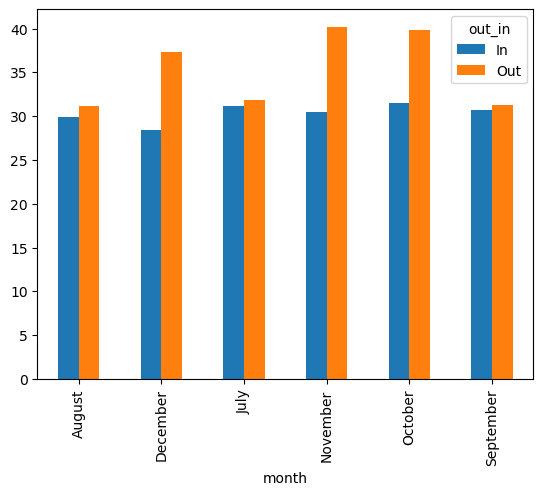

In [27]:
df.groupby(['month','out_in'])['temp'].mean().unstack().plot(kind='bar')

In [36]:
df.groupby(['month','out_in'])['temp'].mean().unstack()

out_in,In,Out
month,,
August,29.942907,31.157604
December,28.401540,37.327046
July,31.125000,31.888889
November,30.429499,40.177580
October,31.528517,39.870501
September,30.671172,31.223356


<AxesSubplot:>

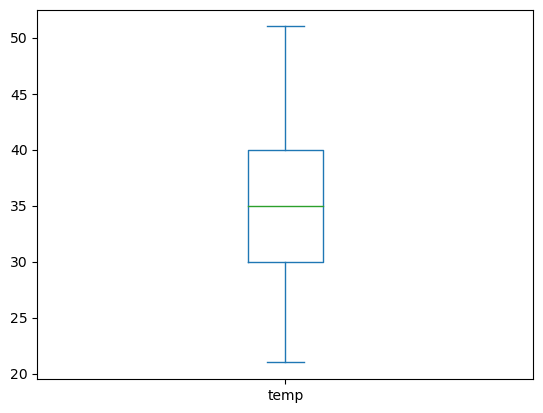

In [28]:
df[['out_in','month','temp']].plot(kind='box')

Text(0, 0.5, 'Temperature')

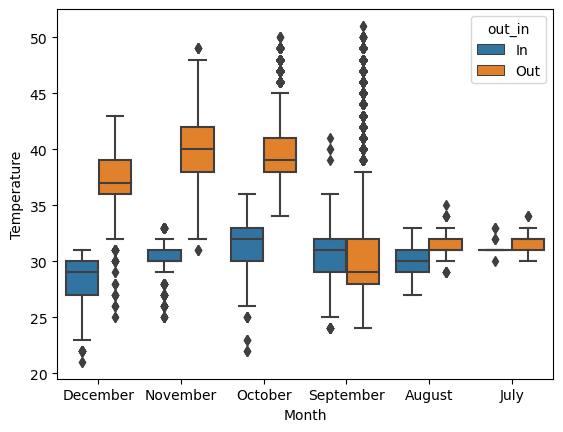

In [29]:
sns.boxplot(x=df['month'],y=df['temp'],hue=df['out_in'])
plt.xlabel('Month')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

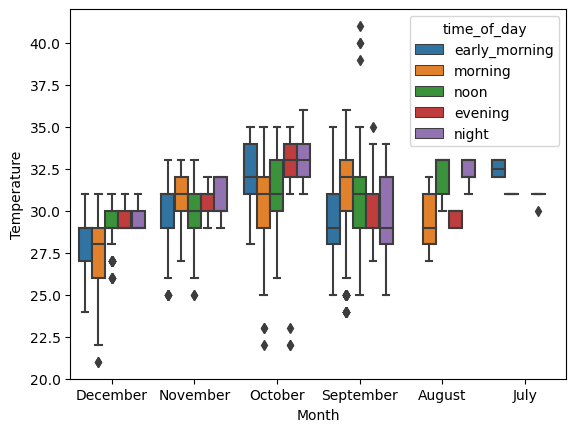

In [30]:
sns.boxplot(x=df['month'][df['out_in']=='In'],y=df['temp'],hue=df['time_of_day'])
plt.xlabel('Month')
plt.ylabel('Temperature')

Text(0, 0.5, 'Temperature')

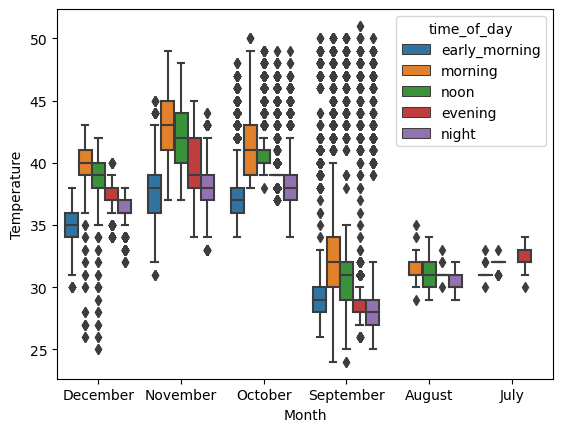

In [31]:
sns.boxplot(x=df['month'][df['out_in']=='Out'],y=df['temp'],hue=df['time_of_day'])
plt.xlabel('Month')
plt.ylabel('Temperature')

In [32]:
df.head()

,num_id,noted_date,temp,out_in,month,day,day_name,hour,time_of_day
0,196134,2018-12-08 09:30:00,29,In,December,8,Saturday,9,morning
1,196131,2018-12-08 09:30:00,29,In,December,8,Saturday,9,morning
2,196127,2018-12-08 09:29:00,41,Out,December,8,Saturday,9,morning
3,196128,2018-12-08 09:29:00,41,Out,December,8,Saturday,9,morning
4,196126,2018-12-08 09:29:00,31,In,December,8,Saturday,9,morning


<AxesSubplot:xlabel='hour'>

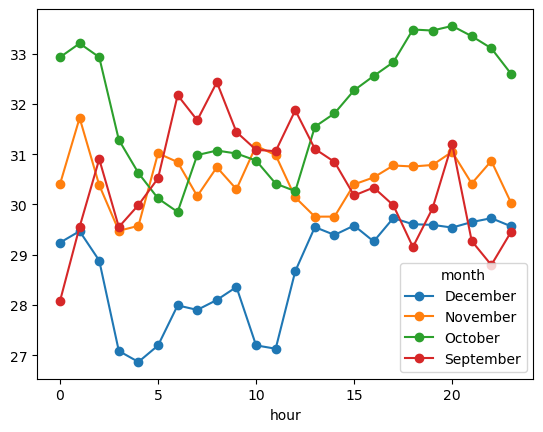

In [33]:
df[df['out_in']=='In'].groupby(['hour','month'])['temp'].mean().unstack().drop(['August','July'],axis=1).plot(kind='line',marker='o')

<AxesSubplot:xlabel='hour'>

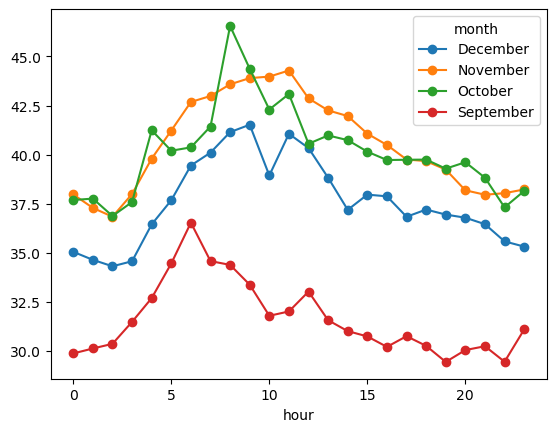

In [34]:
df[df['out_in']=='Out'].groupby(['hour','month'])['temp'].mean().unstack().drop(['August','July'],axis=1).plot(kind='line',marker='o')

<AxesSubplot:xlabel='day_name'>

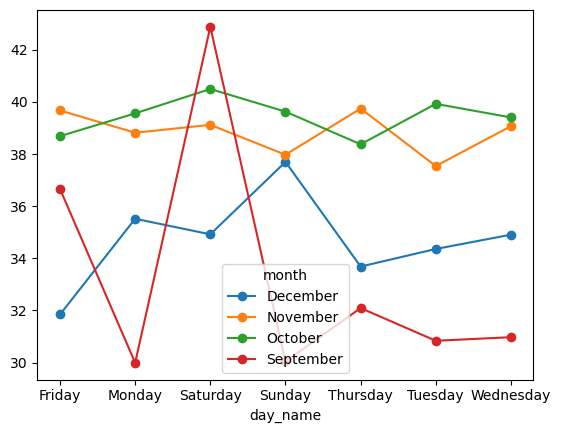

In [35]:
df.groupby(['day_name','month'])['temp'].mean().unstack().drop(['August','July'],axis=1).plot(marker='o')